# 비선형 변환

In [4]:
import os, warnings

warnings.filterwarnings(action="ignore")

In [1]:
# 한글
import matplotlib
from matplotlib import font_manager, rc
font_loc = "C:/Windows/Fonts/malgunbd.ttf"
font_name = font_manager.FontProperties(fname=font_loc).get_name()
matplotlib.rc('font', family=font_name)

matplotlib.rcParams['axes.unicode_minus'] = False

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000,3))
print(X_org.shape)

(1000, 3)


In [11]:
w = rnd.normal(size=3)
y = np.dot(X_org, w)

In [17]:
X = rnd.poisson(10 * np.exp(X_org))

In [12]:
print(y.shape)

(1000,)


In [14]:
y

array([-1.30789783e+00,  1.87255564e+00,  2.23937701e-01, -2.17660898e+00,
       -6.02406677e-01,  4.91009476e-01,  3.84942162e+00,  1.27763647e+00,
       -2.11322293e-02, -2.11259035e+00,  1.40966662e+00, -4.42768388e-01,
        8.17277160e-01,  2.04348122e+00,  8.28567947e-01, -1.35194173e+00,
        1.21187566e+00,  1.78929397e+00, -6.16293431e-02,  5.17938466e-01,
        1.15153843e+00,  4.85442451e-01,  1.29575774e+00, -1.20507228e-01,
       -6.41462646e-01,  7.41038494e-01,  1.76242069e+00,  2.47449440e+00,
       -1.48888876e+00, -1.73575635e+00, -2.31623020e-01, -9.62800722e-01,
       -1.58037644e-02,  2.28439912e+00,  1.78366897e+00,  1.26864237e+00,
       -2.54738460e+00, -2.93195857e+00, -1.39294542e+00, -1.36370653e+00,
       -5.33701559e-01,  2.73055554e-01, -8.82265763e-01, -8.67192987e-01,
        9.18912398e-01,  4.33818943e-01,  2.20762934e+00, -9.17959149e-01,
        1.69425178e+00,  6.70907280e-01,  1.30445999e+00,  9.35286284e-01,
        1.74501384e+00, -

In [18]:
print("값들의 출현 횟수 : ", np.bincount(X[:, 0]))

값들의 출현 횟수 :  [28 37 69 50 60 59 45 55 38 42 35 34 35 27 24 25 27 21 23 23 17 20 10 10
 17  8  7 12 12  7  3  8  4  5  6  3  4  2  4  1  1  3  2  5  3  8  2  5
  3  1  2  3  3  2  2  3  2  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  0  0  0  2  2  0  1  1  0  0  0  1  1  2  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  0  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


Text(0.5, 0, '값')

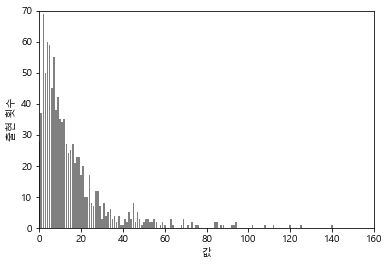

In [19]:
plt.xlim(0, 160)
plt.ylim(0, 70)
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("출현 횟수")
plt.xlabel("값")

Text(0.5, 0, '값')

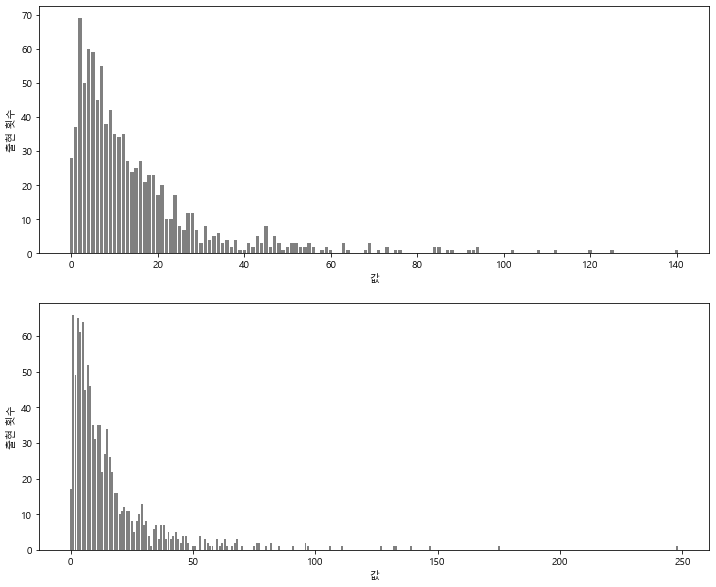

In [20]:
plt.figure(figsize=(12, 10))

plt.subplot(2,1,1)
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("출현 횟수")
plt.xlabel("값")

plt.subplot(2,1,2)
bins = np.bincount(X[:, 1])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("출현 횟수")
plt.xlabel("값")

In [21]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
model = Ridge().fit(X_train, y_train)
model.score(X_test, y_test)

0.6662752922915148

In [28]:
X_train_log = np.log1p(X_train)
X_test_log = np.log1p(X_test)

Text(0.5, 0, '값(log적용)')

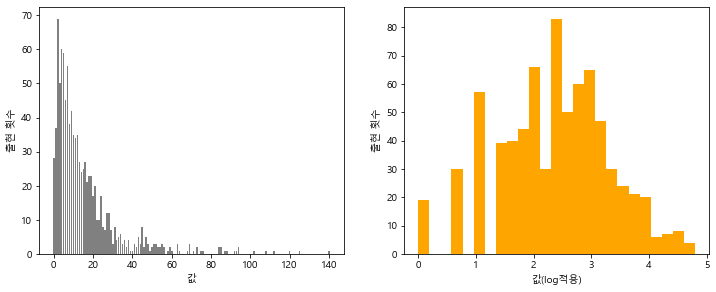

In [25]:
plt.figure(figsize=(12, 10))

plt.subplot(2,2,1)
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("출현 횟수")
plt.xlabel("값")

plt.subplot(2,2,2)
plt.hist( X_train_log[:, 0], bins=25, color='orange')
plt.ylabel("출현 횟수")
plt.xlabel("값(log적용)")

Text(0.5, 0, '값')

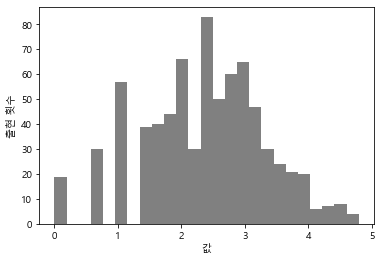

In [26]:
plt.hist(X_train_log[:, 0], bins=25, color="gray")
plt.ylabel("출현 횟수")
plt.xlabel("값")

In [29]:
model = Ridge().fit(X_train_log, y_train)
model.score(X_test_log, y_test)

0.8546552883842318